<a href="https://colab.research.google.com/github/nrhodes/cs152fa2019/blob/master/Assignment_1_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Speeding up gradient descent
The goal in this assignment is to:
* become familiar with Jupyter Notebook/Google colab, including:
  * creating cells
  * timing cells
  * printing notebooks
* become familiar with NumPy
  * Creating NumPy arrays
  * Using NumPy to do array calculations in parallel
    * Adding arrays
    * Multiplying a scalar by an array
    * Applying a function to an array (aka mapping the function to the array)

Your assignment is to:
  * modify this notebook to speed up the computation of `gradient_descent` while maintaining other functionality
  * Add code that optimizes `a0` and `a1` using  gradient descent code as an explicit loop (with no corresponding matplotlib animation display).
  
By using NumPy, you should be able to substantially decrease the running time of gradient descent.

When you are finished, you should have no explicit iteration (loops, other than the new loop that calls gradient_descent), and no implicit iteration (list comprehensions).

Read the entire notebook before beginning. You'll want to write the new code at the end of the notebook first before you start modifying the existing code to use NumPy.


In [0]:
%matplotlib inline

In [0]:
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
from statistics import mean

In [0]:
random.seed(829) # for reproducibility

In [0]:
# parameters for our model:
a1 = 0
a0 = 0

# hyper-parameters
𝜆 = .005

# data info
xendpoints = [0, 5]
num_samples = 2000

def f(x):
  return a1*x + a0

You'll need to modify the initializaton of `xs` and `ys` so that they are NumPy arrays.

In [0]:
# Create num_samples x values in the range xendpoints
xs = [random.random() * (xendpoints[1] - xendpoints[0]) +
      xendpoints[0] for i in range(num_samples)]
# Create associated y values that are randomly jittered from the true line
ys = [(x * .6 + .5) + random.normalvariate(0, .5) for x in xs]

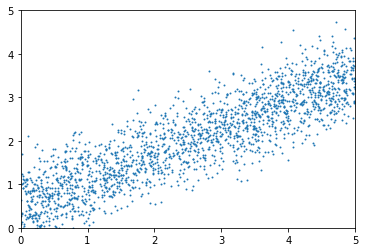

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim((xendpoints[0], xendpoints[1]))
ax.set_ylim((xendpoints[0], xendpoints[1]))

scatter = ax.scatter(xs, ys, s=.9)

poly, = ax.plot([], [], c='red')

loss_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)
weights_text = ax.text(0.02, .82, '', transform=ax.transAxes)

plt.show()

You'll need to modify the function to use NumPy alternatives for your calculations.

In [0]:
def gradient_descent():
  global a0, a1
  diffs = [2 * (f(x) - y) for x, y in zip(xs, ys)]
  gradient_a0 = mean(diffs)
  gradient_a1 = mean([x * diff for x, diff in zip(xs, diffs)])
  a0 -= 𝜆*gradient_a0
  a1 -= 𝜆*gradient_a1

When you're done, you should find that `gradient_descent` runs much faster. 




Please fill in the following table:

|               | Time to run `gradient_descent` once      |
|---------------|-----------|
| Without NumPy | _________ |
| With NumPy    | _________ | 


How many orders of magnitude faster is it?

In [7]:
# Let's see how long it normally takes to run gradient_descent
%timeit gradient_descent()

100 loops, best of 3: 3.86 ms per loop


In [0]:
def loss():
  return mean([(f(x) - y) ** 2 for x, y in zip(xs, ys)])

In [0]:
# initialization function: plot the background of each frame
def init():
  global a0, a1
  a0 = 0
  a1 = 0
  poly.set_data([], [])
    
  # return modified graphical objects
  return poly,

In [0]:
# animation function. This is called sequentially
def animate(i):
  gradient_descent();

  poly.set_data(xendpoints, [f(x) for x in xendpoints])
  loss_text.set_text(f'Loss: {loss():.2f}')
  weights_text.set_text(f'a1: {a1:.2f}, a0: {a0:.2f}')
  
  # return modified graphical objects
  return poly, loss_text, weights_text

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=10, blit=True)

In [21]:
HTML(anim.to_html5_video())

Your final loss, a0, and a1 values should be similar (although not exact due to different initial `ys`)

In [0]:
print('Final loss: ', loss())
print('a0: ', a0)
print('a1: ', a1)

Final loss:  0.25002435783111876
a0:  0.40286944537805747
a1:  0.6277245755144965


# New code needed here
Add code here that will rerun the optimization of `a0` and `a1` as an explicit loop (rather than an implicit loop using `HTML`, `FuncAnimation`, `init`, and `animation`). Run until the loss isn't changing by much:

($\frac{|L_{new}-L_{old})}{L_{new}}| < 10^{-10}$).  
What are the final values of the loss, `a0`, and `a1`?

As well as running it, time it (use `%%time`).
Please fill in the following table:

|               | Time to optimize with animation creation   | Time to optimize without optimization creation |
|---------------|-----------                     |     |
| Without NumPy | ___________________________        |    _________                                               |
| With NumPy    | _________                      |    _________                                               |



# Submit instructions

For all the assignments this semester:
1. Make sure that the output of all cells is up-to-date.  If you have any output in a cell that's excessively long, clear that cell's output.
2. Create a PDF output (easiest way is on a Mac OS computer):
    1. File/print (from Colab's File menu, not Chrome's File menu).
    1. Click "Open PDF in Preview".
    1. When the PDF opens in Preview, save it to your local machine. 
    1. Verify it's what you want to submit!
3. Submit the PDF file to [Gradescope](https://www.gradescope.com/courses/58940)